In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [4]:
samp=pd.read_excel('DT.xlsx')

In [5]:
samp.head()

,Past Trend,Open Interest,Trading Volume,Return
0,Positive,Low,High,Up
1,Negative,High,Low,Down
2,Positive,Low,High,Up
3,Positive,High,High,Up
4,Negative,Low,High,Down


In [6]:
samp_dum=pd.get_dummies(samp,drop_first=True)

In [9]:
samp_dum.columns=samp.columns

In [13]:
out=samp_dum['Return']
inp=samp_dum.drop('Return',1)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(inp,out)
pred=dt.predict(inp)

[Text(133.92000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

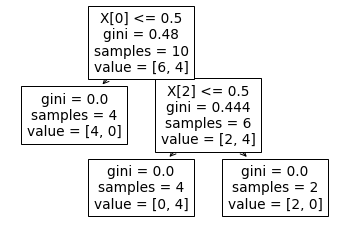

In [15]:
from sklearn import tree
tree.plot_tree(dt)

In [16]:
data=pd.read_csv('balance_data.csv')

In [17]:
data.head(2)

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [19]:
data['Class Name']=data['Class Name'].replace({'B':0,'R':1,'L':2})

In [20]:
out=data['Class Name']
inp=data.drop('Class Name',1)

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3, random_state=48,stratify=out)

In [22]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.86      0.84      0.85        87
           2       0.87      0.86      0.87        86

    accuracy                           0.78       188
   macro avg       0.58      0.57      0.57       188
weighted avg       0.80      0.78      0.79       188



In [24]:
out.value_counts()

2    288
1    288
0     49
Name: Class Name, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm=SMOTE(random_state=48)
x_bal,y_bal=sm.fit_resample(inp,out)

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x_bal,y_bal,test_size=0.3, random_state=48,stratify=y_bal)
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        87
           1       0.93      0.77      0.84        87
           2       0.88      0.80      0.84        86

    accuracy                           0.83       260
   macro avg       0.85      0.83      0.84       260
weighted avg       0.85      0.83      0.84       260



In [29]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score,make_scorer

In [30]:
kfold=KFold(n_splits=5,shuffle=True)
scorer = make_scorer(f1_score, average = 'weighted')
score=cross_val_score(dt,x_bal,y_bal,cv=kfold,scoring=scorer)

In [31]:
np.mean(score)

0.8341116854899499

In [32]:
bias_err= 1-np.mean(score)
bias_err

0.16588831451005015

In [33]:
var_err=np.var(score)
var_err

2.9774003139032714e-05

In [34]:
std_err=np.std(score)
std_err

0.005456555977815376

In [35]:
kfold=KFold(n_splits=5,random_state=48,shuffle=True)
for i in [5,8,10,12,14,16,18,20,40]:
    #for j in [10,15,20,30]:
    dt=DecisionTreeClassifier(max_depth=i,min_samples_split=4,random_state=48)
    scorer = make_scorer(f1_score, average = 'weighted')
    score=cross_val_score(dt,x_bal,y_bal,cv=kfold,scoring=scorer)
    print('max_depth:',i)
    print('Bias Error',1-np.mean(score))
    print('Variance Error',np.std(score))

max_depth: 5
Bias Error 0.33600382746790824
Variance Error 0.10080634318159824
max_depth: 8
Bias Error 0.1959646326923853
Variance Error 0.04010380695644111
max_depth: 10
Bias Error 0.18302866133053397
Variance Error 0.03312244121466178
max_depth: 12
Bias Error 0.18280582186626704
Variance Error 0.029291388210370792
max_depth: 14
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054
max_depth: 16
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054
max_depth: 18
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054
max_depth: 20
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054
max_depth: 40
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054


In [36]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48, splitter='best')

In [37]:
dt.feature_importances_

array([0.29275814, 0.23054982, 0.32177965, 0.15491239])

In [38]:
#!pip install treeinterpreter

In [39]:
from treeinterpreter import treeinterpreter as ti

C:\Users\senthil kumar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [40]:
obser = inp.loc[110].values.reshape(1,-1)
obser

array([[1, 5, 3, 1]], dtype=int64)

In [41]:
prediction, bias, contributions = ti.predict(dt,obser)

In [42]:
prediction

array([[0., 0., 1.]])

In [43]:
contributions

array([[[ 0.42719207,  0.04601714, -0.47320921],
        [-0.36801932, -0.06231884,  0.43033816],
        [-0.45871795,  0.03974359,  0.41897436],
        [ 0.06676374, -0.35622334,  0.2894596 ]]])

In [44]:
bias

array([[0.33278146, 0.33278146, 0.33443709]])

In [45]:
#prediction = bias + feature_1_contribution + ... + feature_n_contribution

In [58]:
dt.feature_importances_

array([0.29275814, 0.23054982, 0.32177965, 0.15491239])

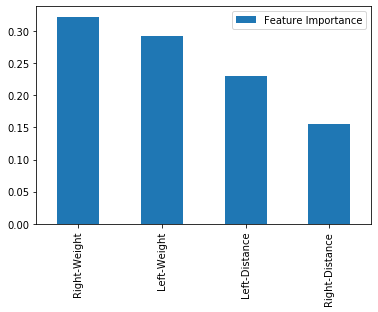

In [57]:
fi=dt.feature_importances_
fi=pd.DataFrame(fi)
fi.index=inp.columns
fi.columns=['Feature Importance']
fi=fi.sort_values('Feature Importance',ascending=False)
fi.plot(kind='bar')

### Random Forest

In [59]:
data=pd.read_csv('cancer_data.csv')

In [60]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [61]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [78]:
data['diagnosis']=data['diagnosis'].replace({'B':0,'M':1})

In [79]:
id1=data['id']
out=data['diagnosis']
inp=data.drop(['id','diagnosis','Unnamed: 32'],1)

In [80]:
inp.isnull().sum().sum()

0

In [81]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48,stratify=out)

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf_mod=RandomForestClassifier()
rf_mod.fit(xtrain,ytrain)
ypred=rf_mod.predict(xtest)

In [84]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       107
           1       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [85]:
params={'n_estimators':[20,30,40,50,60], 'ccp_alpha':[0.1,0.15],'max_features':['auto','sqrt','log2'],
       'criterion':['gini','entropy']}

In [86]:
from sklearn.model_selection import GridSearchCV

In [98]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1',return_train_score=True)

In [99]:
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [100]:
cvres=pd.DataFrame(hyp_mod.cv_results_)
cvres

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076354,0.018882,0.008684,0.004996,0.1,gini,auto,20,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.881356,...,0.892152,0.019331,33,0.905830,0.935065,0.914798,0.908297,0.948718,0.922542,0.016638
1,0.097114,0.007229,0.007785,0.001986,0.1,gini,auto,30,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.903226,...,0.891144,0.028687,34,0.917749,0.937238,0.911504,0.897778,0.944206,0.921695,0.016969
2,0.134244,0.020953,0.008783,0.000245,0.1,gini,auto,40,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.866667,...,0.877800,0.020344,53,0.906667,0.918455,0.915556,0.901786,0.914530,0.911399,0.006192
3,0.154605,0.018201,0.011977,0.002404,0.1,gini,auto,50,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.900000,...,0.892479,0.033085,31,0.911504,0.913043,0.901786,0.930435,0.901786,0.911711,0.010483
4,0.202314,0.019231,0.017167,0.004312,0.1,gini,auto,60,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.866667,...,0.878994,0.024905,51,0.902655,0.923077,0.925110,0.911504,0.957265,0.923922,0.018549
5,0.069966,0.009947,0.005889,0.000734,0.1,gini,sqrt,20,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.918033,...,0.885475,0.034838,43,0.905830,0.923729,0.895928,0.903509,0.943723,0.914544,0.017205
6,0.107495,0.014960,0.009083,0.001652,0.1,gini,sqrt,30,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.900000,...,0.875470,0.023013,56,0.900901,0.928270,0.925764,0.916300,0.925764,0.919400,0.010114
7,0.138736,0.008084,0.010380,0.001930,0.1,gini,sqrt,40,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.931034,...,0.895321,0.029910,27,0.915556,0.929825,0.929204,0.902655,0.934498,0.922347,0.011700
8,0.179558,0.021181,0.013274,0.003949,0.1,gini,sqrt,50,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.900000,...,0.873643,0.031949,59,0.915556,0.917749,0.919643,0.916300,0.943723,0.922594,0.010656
9,0.222576,0.027063,0.013674,0.001533,0.1,gini,sqrt,60,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_f...",0.903226,...,0.881071,0.018343,46,0.911504,0.917749,0.920354,0.897778,0.919643,0.913406,0.008413


In [101]:
cvres[cvres['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
54,0.195528,0.007943,0.010879,0.001797,0.15,entropy,sqrt,60,"{'ccp_alpha': 0.15, 'criterion': 'entropy', 'm...",0.935484,...,0.918235,0.016956,1,0.926407,0.94958,0.945148,0.908297,0.966102,0.939107,0.019927


In [102]:
tun_mod.best_score_

0.9182345463213094

In [103]:
final_mod=RandomForestClassifier(**tun_mod.best_params_,oob_score=True)

In [104]:
final_mod.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.15, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [106]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       107
           1       0.95      0.86      0.90        64

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [107]:
print(classification_report(ytrain,ypred1_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       250
           1       0.96      0.90      0.93       148

    accuracy                           0.95       398
   macro avg       0.95      0.94      0.95       398
weighted avg       0.95      0.95      0.95       398



In [108]:
final_mod.oob_score_

0.9321608040201005

In [114]:

oob=[]
fe=[10,20,50,60,100,200,300,400,500,600,800,1000]
for i in fe:
    mod=RandomForestClassifier(n_estimators=i,random_state=48,oob_score=True)
    mod.fit(xtrain,ytrain)
    oob.append(mod.oob_score_)
    

C:\Users\senthil kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\senthil kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [115]:
oob=np.array(oob)

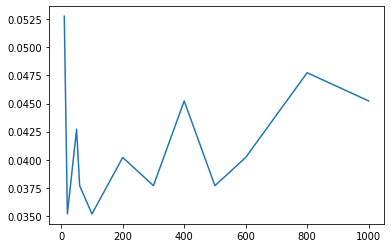

In [116]:
plt.plot(fe,1-oob)

In [332]:
oob

[0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015]

In [ ]:
final_mod.feature